# **Samuel Vasco Vasco González**  Cc. 1152223665

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [3]:
#import and show dataset
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural_Network_Course/Homework 3/data.csv',header=None)
data.columns=["X","y"]
data

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


## We go to implement numerically gradient descent whit 100 iterations on the "data.csv" which represent some linear regression problem (fitting).

The parameters are:

* $\theta_1 = 10$      initial values of $y=\theta_1*x + \theta_0$  
* $\theta_0 = 10$        
* $\alpha = 0.0001$    The learning Rate  
* $epochs = 100$      The number of iterations

After finding the optimal $\theta_0$ and $\theta_1$ that minimized the MSE function.

Hypotesis: $$h_\theta(x)=\theta_1x+\theta_0$$

Ecuation of recurrency for $\theta$'s:

$$ \theta_0:=\theta_0 -\alpha \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]$$

$$ \theta_1:=\theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left[ h_{\theta}(x_i) - y_i\right] x_i$$

The loss functions that we use are: 

$$MSE = \frac{1}{m} \sum_{i=1}^{m}[y_i - h_{\theta}(x_i)]^2$$

$$MAE = \frac{1}{m} \sum_{i=1}^{m}|y_i - h_{\theta}(x_i)| $$

$$MAPE = \frac{100}{m} \sum_{i=1}^{m} \left|\frac{y_i - h_{\theta}(x_i)}{y_i}\right| $$

Where $h_{\theta}(x_i)$ is the value predicted by model or $y_{pred}$. 

The values of parameters using Descent Gradient and Curve Fit are: 

Descent Gradient Alpha=0.0001 
 theta_0= 9.828 
 theta_1= 1.2863 

Descent Gradient Alpha=0.0007 
 theta_0= 9.8239 
 theta_1= 1.2864 

Curve Fit 
 theta_0= 7.991 
 theta_1= 1.3224


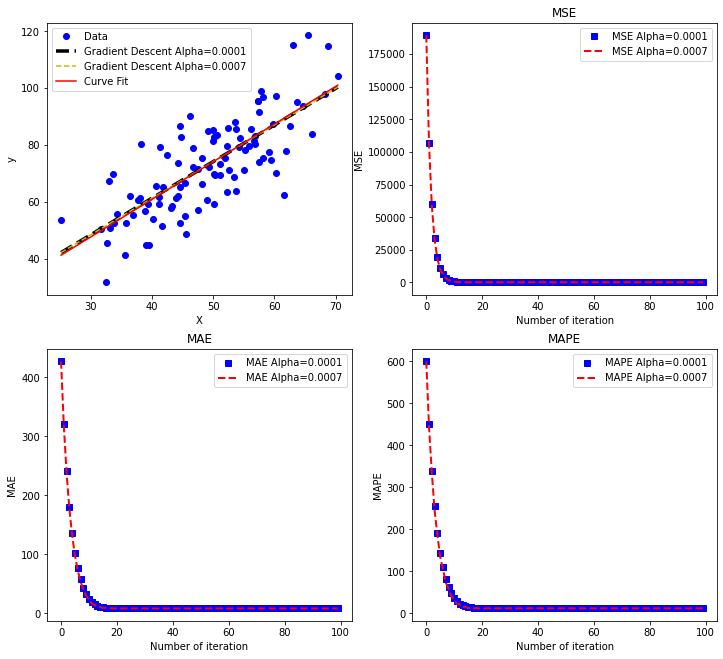

In [6]:
def Gradient_descent_plus(X,y,alpha,theta0,theta1,epochs):
  iterations=np.arange(epochs)
  m=len(X)
  MSE=[]
  MAE=[]
  MAPE=[]
  for i in iterations:
    pred=theta1*X+theta0

    mse=1/m*np.sum((y-pred)**2)
    mae=1/m*np.sum(np.abs(y-pred))
    mape=100/m*np.sum(np.abs((y-pred)/y))

    MSE.append(mse)
    MAE.append(mae)
    MAPE.append(mape)

    theta0=theta0-alpha/m*np.sum(pred-y)
    theta1=theta1-alpha/m*np.sum((pred-y)*X)
  
  return theta0,theta1,MSE,MAE,MAPE

X=data["X"].values
y=data["y"].values
theta0=10
theta1=10
alpha=0.0001
epochs=100

theta0_1,theta1_1,MSE1,MAE1,MAPE1= Gradient_descent_plus(X,y,alpha,theta0,theta1,epochs)

alpha=0.0007

theta0_2,theta1_2,MSE2,MAE2,MAPE2= Gradient_descent_plus(X,y,alpha,theta0,theta1,epochs)

X_fit=np.linspace(np.min(X),np.max(X),100)
y_fit1=theta1_1*X_fit + theta0_1

y_fit2=theta1_2*X_fit + theta0_2

def f(x,theta1,theta0):
  return theta1*x + theta0
param, cov = curve_fit(f, X, y)

fig, axs = plt.subplots(2, 2)
fig=figsize(12,11)
iterations=np.arange(epochs)
axs[0,0].plot(X,y,"bo",label="Data")
axs[0,0].plot(X_fit,y_fit1,"k--" ,linewidth=3.5, label="Gradient Descent Alpha=0.0001")
axs[0,0].plot(X_fit,y_fit2,"y--" ,linewidth=1.5, label="Gradient Descent Alpha=0.0007")
axs[0,0].plot(X_fit,f(X_fit,param[0],param[1]),"r",label="Curve Fit")
axs[0,0].set_xlabel("X")
axs[0,0].set_ylabel("y")
axs[0,0].legend()
axs[0,1].plot(iterations,MSE1,"bs" ,linewidth=2, label="MSE Alpha=0.0001")
axs[0,1].plot(iterations,MSE2,"r--" ,linewidth=2, label="MSE Alpha=0.0007")
axs[0,1].set_xlabel("Number of iteration")
axs[0,1].set_ylabel("MSE")
axs[0,1].set_title("MSE")
axs[0,1].legend()
axs[1,0].plot(iterations,MAE1,"bs" ,linewidth=2, label="MAE Alpha=0.0001")
axs[1,0].plot(iterations,MAE2,"r--" ,linewidth=2, label="MAE Alpha=0.0007")
axs[1,0].set_xlabel("Number of iteration")
axs[1,0].set_ylabel("MAE")
axs[1,0].set_title("MAE")
axs[1,0].legend()
axs[1,1].plot(iterations,MAPE1,"bs" ,linewidth=2, label="MAPE Alpha=0.0001")
axs[1,1].plot(iterations,MAPE2,"r--" ,linewidth=2, label="MAPE Alpha=0.0007")
axs[1,1].set_xlabel("Number of iteration")
axs[1,1].set_ylabel("MAPE")
axs[1,1].set_title("MAPE")
axs[1,1].legend()

print("The values of parameters using Descent Gradient and Curve Fit are: \n")
print("Descent Gradient Alpha=0.0001 \n theta_0= {:.5} \n theta_1= {:.5} \n".format(theta0_1,theta1_1))
print("Descent Gradient Alpha=0.0007 \n theta_0= {:.5} \n theta_1= {:.5} \n".format(theta0_2,theta1_2))
print("Curve Fit \n theta_0= {:.5} \n theta_1= {:.5}".format(param[1],param[0]))
